In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
EPOCHS = 10
BATCH_SIZE = 32

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
 X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape

(50000, 1)

In [6]:
cat_indices = np.where(y_train == 3)[0]
dog_indices = np.where(y_train == 5)[0]
cat_images = X_train[cat_indices]
dog_images = X_train[dog_indices]

In [7]:
cat_labels = np.ones(len(cat_images))
dog_labels = np.zeros(len(dog_images))

In [8]:
X_data = np.concatenate([cat_images, dog_images], axis=0)
y_data = np.concatenate([cat_labels, dog_labels], axis=0)
shuffle_indices = np.random.permutation(len(X_data))
X_data = X_data[shuffle_indices]
y_data = y_data[shuffle_indices]

In [9]:
split_idx = int(0.8 * len(X_data))
X_train = X_data[:split_idx]
y_train = y_data[:split_idx]
X_test = X_data[split_idx:]
y_test = y_data[split_idx:]

In [10]:
classes = 2

In [11]:
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))


'binary_crossentropy'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [13]:
model_history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/10
250/250 [==============================] - 16s 54ms/step - loss: 1.4545 - accuracy: 0.5523 - val_loss: 0.6695 - val_accuracy: 0.6015
Epoch 2/10
250/250 [==============================] - 13s 53ms/step - loss: 0.6524 - accuracy: 0.6149 - val_loss: 0.6570 - val_accuracy: 0.6035
Epoch 3/10
250/250 [==============================] - 13s 52ms/step - loss: 0.6164 - accuracy: 0.6521 - val_loss: 0.6415 - val_accuracy: 0.6380
Epoch 4/10
250/250 [==============================] - 13s 53ms/step - loss: 0.5782 - accuracy: 0.6933 - val_loss: 0.6322 - val_accuracy: 0.6520
Epoch 5/10
250/250 [==============================] - 13s 53ms/step - loss: 0.5323 - accuracy: 0.7237 - val_loss: 0.6248 - val_accuracy: 0.6735
Epoch 6/10
250/250 [==============================] - 13s 52ms/step - loss: 0.4917 - accuracy: 0.7506 - val_loss: 0.6951 - val_accuracy: 0.6400
Epoch 7/10
250/250 [==============================] - 13s 52ms/step - loss: 0.4615 - accuracy: 0.7784 - val_loss: 0.6544 - val_accuracy:

In [14]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 19ms/step - loss: 0.8036 - accuracy: 0.6760


[0.8035797476768494, 0.6759999990463257]

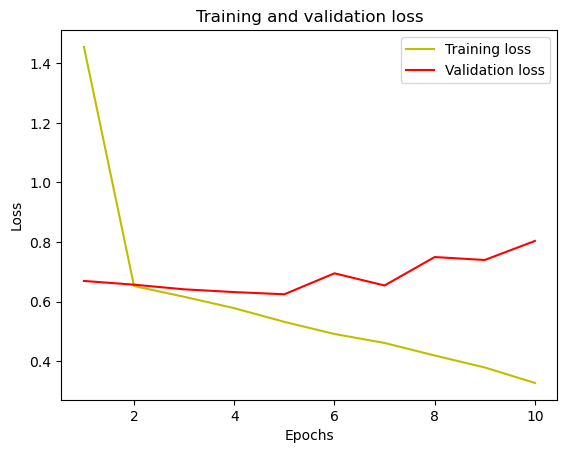

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

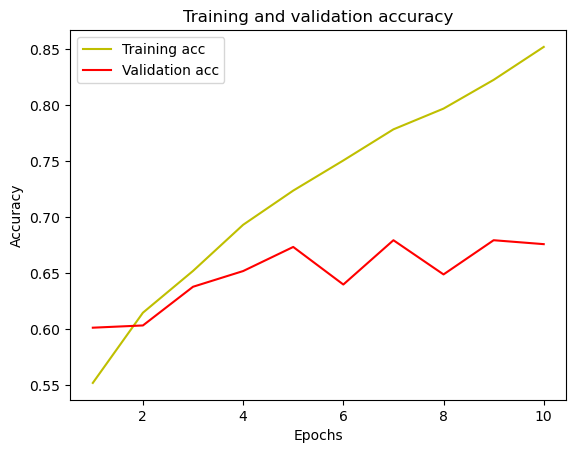

In [16]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       986
           1       0.69      0.66      0.67      1014

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000

[[684 302]
 [346 668]]
